In [38]:
import pandas as pd
from pandas import *
import folium
import plotly.graph_objects as go

import pycountry # To convert country names to 3 letter code

import webbrowser

In [16]:
# Getting data
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
new_base_url = 'https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series'

def loadData(fileName, columnName):
    data = pd.read_csv(base_url + fileName) \
             .melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date', value_name=columnName) \
             .fillna('<all>')
    data['date'] = data['date'].astype('datetime64[ns]')
    return data

In [17]:
all_data = loadData("time_series_covid19_confirmed_global.csv", "CumConfirmed") \
    .merge(loadData("time_series_covid19_deaths_global.csv", "CumDeaths"))

In [18]:
all_data.head()

,Province/State,Country/Region,Lat,Long,date,CumConfirmed,CumDeaths
0,<all>,Afghanistan,33.0000,65.0000,2020-01-22,0,0
1,<all>,Albania,41.1533,20.1683,2020-01-22,0,0
2,<all>,Algeria,28.0339,1.6596,2020-01-22,0,0
3,<all>,Andorra,42.5063,1.5218,2020-01-22,0,0
4,<all>,Angola,-11.2027,17.8739,2020-01-22,0,0


In [19]:
grouped_countries = all_data.groupby('Country/Region').agg({'CumConfirmed': 'max', 'CumDeaths': 'max'}).reset_index()
grouped_countries.head()

,Country/Region,CumConfirmed,CumDeaths
0,Afghanistan,281,6
1,Albania,304,17
2,Algeria,1171,105
3,Andorra,439,16
4,Angola,8,2


In [20]:
grouped_countries[grouped_countries['Country/Region'] == 'Canada']

,Country/Region,CumConfirmed,CumDeaths
32,Canada,6101,67


In [21]:
grouped_countries['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

In [22]:
burma = pycountry.countries.get(alpha_3='MMR')

# Country(alpha_2='DE', alpha_3='DEU', name='Germany', numeric='276', official_name='Federal Republic of Germany')
# germany.alpha_2

burma.name

# germany.numeric

# german


'Myanmar'

In [23]:
input_countries = grouped_countries['Country/Region']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]

print(codes)
grouped_countries['code'] = codes

['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BTN', 'Unknown code', 'BIH', 'BWA', 'BRA', 'Unknown code', 'BGR', 'BFA', 'Unknown code', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'Unknown code', 'Unknown code', 'CRI', 'Unknown code', 'HRV', 'CUB', 'CYP', 'CZE', 'DNK', 'Unknown code', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'Unknown code', 'HND', 'HUN', 'ISL', 'IND', 'IDN', 'Unknown code', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'Unknown code', 'Unknown code', 'KWT', 'KGZ', 'Unknown code', 'LVA', 'LBN', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'Unknown code', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'Unknown code', 'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'NAM', 'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA'

In [24]:
grouped_countries.head(50)

,Country/Region,CumConfirmed,CumDeaths,code
0,Afghanistan,281,6,AFG
1,Albania,304,17,ALB
2,Algeria,1171,105,DZA
3,Andorra,439,16,AND
4,Angola,8,2,AGO
5,Antigua and Barbuda,15,0,ATG
6,Argentina,1265,39,ARG
7,Armenia,736,7,ARM
8,Australia,2389,12,AUS
9,Austria,11524,168,AUT


In [25]:
grouped_countries[grouped_countries.code == 'Unknown code']

,Country/Region,CumConfirmed,CumDeaths,code
20,Bolivia,132,9,Unknown code
24,Brunei,134,1,Unknown code
27,Burma,20,1,Unknown code
38,Congo (Brazzaville),22,2,Unknown code
39,Congo (Kinshasa),134,13,Unknown code
41,Cote d'Ivoire,218,1,Unknown code
47,Diamond Princess,712,11,Unknown code
74,Holy See,7,0,Unknown code
80,Iran,53183,3294,Unknown code
90,"Korea, South",10062,174,Unknown code


In [26]:
unknown_codes = list(zip(grouped_countries[grouped_countries.code == 'Unknown code'].index, grouped_countries['Country/Region']))
unknown_codes

[(20, 'Afghanistan'),
 (24, 'Albania'),
 (27, 'Algeria'),
 (38, 'Andorra'),
 (39, 'Angola'),
 (41, 'Antigua and Barbuda'),
 (47, 'Argentina'),
 (74, 'Armenia'),
 (80, 'Australia'),
 (90, 'Austria'),
 (91, 'Azerbaijan'),
 (94, 'Bahamas'),
 (102, 'Bahrain'),
 (112, 'Bangladesh'),
 (138, 'Barbados'),
 (160, 'Belarus'),
 (161, 'Belgium'),
 (162, 'Belize'),
 (169, 'Benin'),
 (176, 'Bhutan'),
 (177, 'Bolivia'),
 (178, 'Bosnia and Herzegovina')]

In [27]:
# codes_to_add = ['BOL', 'BWN', 'MMR', 'COG', 'COD', 'CIV', 'VAT', 'IRN', 'KOR', 'RKS', 'LAO', 'MDA', 'RUS', 'TWN', 'TZA', 'USA', 'VEN', 'VNM', 'PSE']                                 

# for index, country in unknown_codes:
    
#     print(index)
#     grouped_countries.loc[index, 'code'] = [codes_to_add[i] for i in range(len(codes_to_add))]
    

In [30]:
#[print(i) for i in range(len(codes_to_add))]

In [34]:
# Manually adding 3-letter codes
grouped_countries.loc[20, 'code'] = 'BOL'
grouped_countries.loc[24, 'code'] = 'BWN'
grouped_countries.loc[27, 'code'] = 'MMR'
grouped_countries.loc[38, 'code'] = 'COG'
grouped_countries.loc[39, 'code'] = 'COD'
grouped_countries.loc[41, 'code'] = 'CIV'
grouped_countries.loc[74, 'code'] = 'VAT'
grouped_countries.loc[80, 'code'] = 'IRN'
grouped_countries.loc[90, 'code'] = 'KOR'
grouped_countries.loc[91, 'code'] = 'RKS'
grouped_countries.loc[94, 'code'] = 'LAO'
grouped_countries.loc[112, 'code'] = 'MDA'
grouped_countries.loc[138, 'code'] = 'RUS'
grouped_countries.loc[160, 'code'] = 'SYR'
grouped_countries.loc[161, 'code'] = 'TWN'
grouped_countries.loc[162, 'code'] = 'TZA'
grouped_countries.loc[169, 'code'] = 'USA'
grouped_countries.loc[176, 'code'] = 'VEN'
grouped_countries.loc[177, 'code'] = 'VNM'
grouped_countries.loc[178, 'code'] = 'PSE'

In [35]:
grouped_countries.iloc[172]

Country/Region    United Arab Emirates
CumConfirmed                      1264
CumDeaths                            9
code                               ARE
Name: 172, dtype: object

In [36]:
grouped_countries[grouped_countries.code == 'Unknown code']

,Country/Region,CumConfirmed,CumDeaths,code
47,Diamond Princess,712,11,Unknown code
102,MS Zaandam,9,2,Unknown code


In [19]:
#colordict = {0: 'lightblue', 1: 'lightgreen', 2: 'orange', 3: 'red'}

In [20]:
all_data['Lat']

0        33.000000
1        41.153300
2        28.033900
3        42.506300
4       -11.202700
           ...    
17275   -22.328500
17276    -3.373100
17277     8.460555
17278    12.178400
17279   -13.254308
Name: Lat, Length: 17280, dtype: float64

In [21]:
all_data['Long']

0        65.000000
1        20.168300
2         1.659600
3         1.521800
4        17.873900
           ...    
17275    24.684900
17276    29.918900
17277   -11.779889
17278   -68.238500
17279    34.301525
Name: Long, Length: 17280, dtype: float64

In [22]:
all_data['location'] = list(zip(all_data['Lat'], all_data['Long']))

In [23]:
all_data.head()

,Province/State,Country/Region,Lat,Long,date,CumConfirmed,CumDeaths,CumRecovered,location
0,<all>,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,"(33.0, 65.0)"
1,<all>,Albania,41.1533,20.1683,2020-01-22,0,0,0,"(41.1533, 20.1683)"
2,<all>,Algeria,28.0339,1.6596,2020-01-22,0,0,0,"(28.0339, 1.6596)"
3,<all>,Andorra,42.5063,1.5218,2020-01-22,0,0,0,"(42.5063, 1.5218)"
4,<all>,Angola,-11.2027,17.8739,2020-01-22,0,0,0,"(-11.2027, 17.8739)"


In [24]:
confirmed = all_data.CumConfirmed
confirmed

0        0
1        0
2        0
3        0
4        0
        ..
17275    4
17276    3
17277    2
17278    2
17279    3
Name: CumConfirmed, Length: 17280, dtype: int64

In [25]:
latitude = 37.0902
longitude = -95.7129
corona_map = folium.Map(location=[latitude, longitude], zoom_start=3)

def map_locations():
    locations = all_data['location']
    confirmed_cases = all_data.CumConfirmed
    deaths = all_data.CumDeaths
    countries = all_data['Country/Region']

    for location, confirmed, death, country in zip(locations, confirmed_cases, deaths, countries):
        folium.CircleMarker(location, threshold_scale=[0,1000,20000,50000], color='#3186cc', weight=0.3,        
            fill_color='#C23208',
            fill=True,
            fill_opacity=0.7, tooltip = ('<H6>' + country + '</H6>' + '<br>' 
                                               'Confirmed: ' + '<strong style="color:#C23208;">' + str(confirmed) +'</strong>' + '<br>'
                                               'Deaths: ' + '<strong style="color:#C23208;">' + str(death) + '</strong>' + '<br>'
                    )).add_to(corona_map)
    return corona_map

In [26]:
location_map = map_locations()
location_map.save(outfile='location_map.html')

In [27]:
# country_geo = 'world_countries.json'
# m = folium.Map(location=[48, -102], zoom_start=3)

# folium.Choropleth(
#     geo_data=country_geo,
#     data=all_data.CumConfirmed
# ).add_to(m)

# folium.LayerControl().add_to(m)

#m

In [28]:
# map2 = folium.Map(location=[38.9, -77.05], tiles='CartoDB dark_matter', zoom_start=11)

# marker_cluster = folium.MarkerCluster().add_to(map2)

# for point in range(0, len(locationlist)):
#     folium.Marker(locationlist[point], popup=df_counters['Name'][point]).add_to(marker_cluster)
# map2

In [29]:
# for lat, lon, traffic_q, traffic, bike, city in zip(df['latitude'], df['longitude'], df['traffic_index_quartile'], df['traffic_index'], df['bike_score'], df['city']):
#     folium.CircleMarker(
#         [lat, lon],
#         radius=.15*bike,
#         popup = ('City: ' + str(city).capitalize() + '<br>'
#                  'Bike score: ' + str(bike) + '<br>'
#                  'Traffic level: ' + str(traffic) +'%'
#                 ),
#         color='b',
#         key_on = traffic_q,
#         threshold_scale=[0,1,2,3],
#         fill_color=colordict[traffic_q],
#         fill=True,
#         fill_opacity=0.7
#         ).add_to(traffic_map)
# traffic_map

In [49]:
grouped_countries.head()

,Country/Region,CumConfirmed,CumDeaths,code
0,Afghanistan,281,6,AFG
1,Albania,304,17,ALB
2,Algeria,1171,105,DZA
3,Andorra,439,16,AND
4,Angola,8,2,AGO


In [50]:
grouped_countries[grouped_countries['code'] == 'USA']

,Country/Region,CumConfirmed,CumDeaths,code
169,US,275586,7087,USA


In [51]:
import plotly.graph_objects as go
import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

# def world_map():
#     fig = go.Figure(data=go.Choropleth(
#         locations = all_data['location'],
#         z = all_data['CumConfirmed'],
#         text = all_data['Country/Region'],
#         colorscale = 'Blues',
#         autocolorscale=False,
#         reversescale=True,
#         marker_line_color='darkgray',
#         marker_line_width=0.5,
#         colorbar_tickprefix = '$',
#         colorbar_title = 'GDP<br>Billions US$',
#     ))

#     fig.update_layout(
#         title_text='2014 Global GDP',
#         geo=dict(
#             showframe=False,
#             showcoastlines=False,
#             projection_type='equirectangular'
#         ),
#         annotations = [dict(
#             x=0.55,
#             y=0.1,
#             xref='paper',
#             yref='paper',
#             text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
#                 CIA World Factbook</a>',
#             showarrow = False
#         )]
#     )

#     return fig

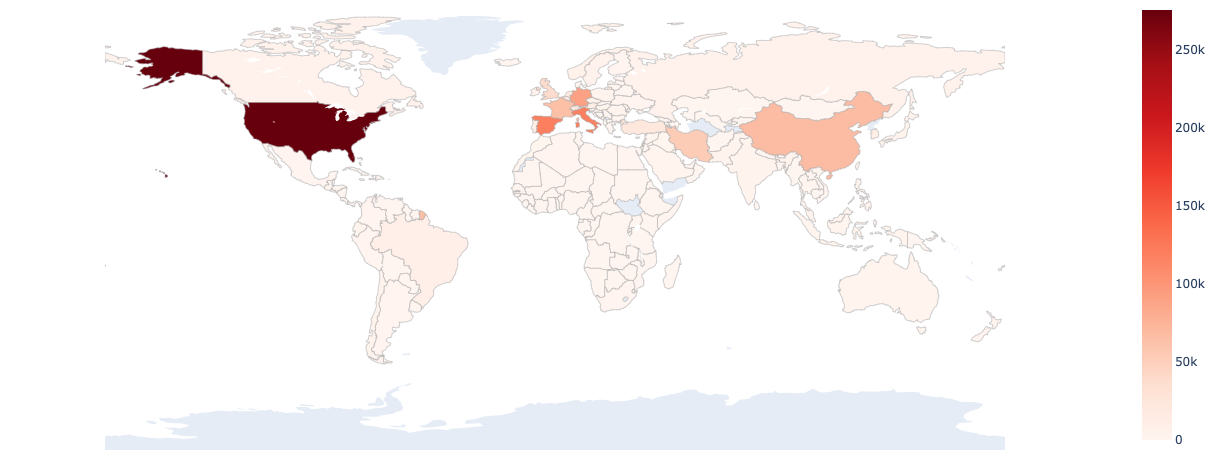

In [55]:
fig = go.Figure(data=go.Choropleth(
        locations = grouped_countries['code'],
        z = grouped_countries['CumConfirmed'],
#         text = grouped_countries['CumConfirmed'],
        colorscale = 'Reds',
        autocolorscale=False,
        reversescale=False,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_tickprefix = '',
        colorbar_title = '',
    ))

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
        title_text='',
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        )
    )
fig.update_traces(hovertemplate='<b>' + grouped_countries['Country/Region'] +
                      '</b>' + '<br>' + 'Confirmed Cases: ' +
                      grouped_countries['CumConfirmed'].astype(str) + '<br>' +
                      'Deaths: ' + grouped_countries['CumDeaths'].astype(str))

fig.show()

In [34]:
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# import plotly.graph_objects as go
# from dash.dependencies import Input, Output
# import dash_bootstrap_components as dbc

# external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
# app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
# app.layout = html.Div(children=[
#     html.H1(children=''),
# dcc.Graph(
#         id='example-graph-1',
#         figure=fig
#     ),
# ])
# if __name__ == '__main__':
#     app.run_server(debug=True)

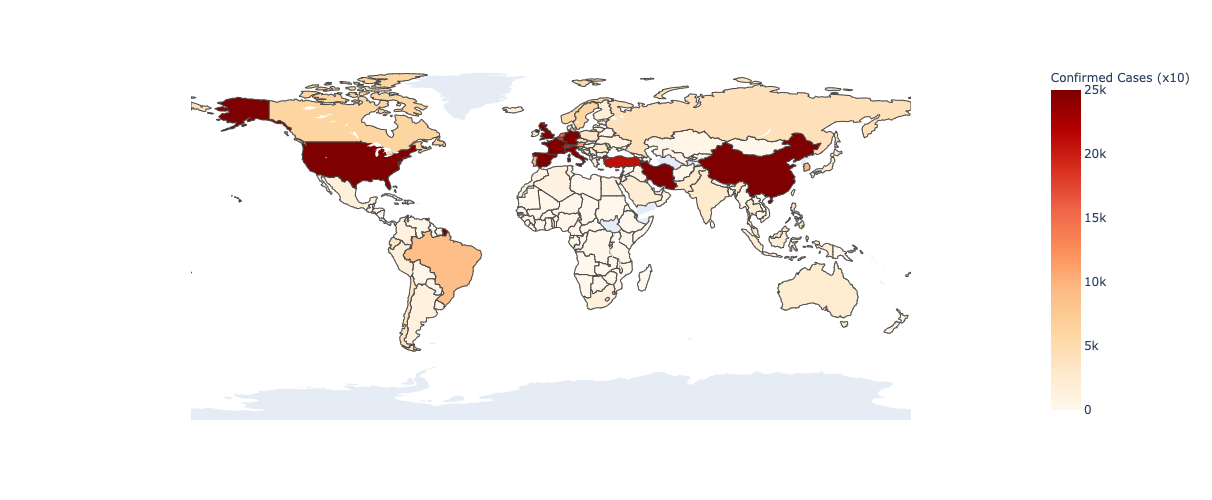

In [43]:
import plotly.express as px
import numpy as np

colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"]

endpts = list(np.linspace(1, 12, len(colorscale) - 1))

fig = px.choropleth(grouped_countries, locations='code',
                    hover_data=["CumConfirmed", "CumDeaths"],
                    color='CumConfirmed',
                    range_color=(0, 25000),
                    color_continuous_scale='orrd', 
                    labels={'CumConfirmed': 'Confirmed Cases (x10)', 'CumDeaths': 'Deaths'}, 
                    featureidkey="grouped_countries.CumDeaths",

                    scope='world', height=500, width=1000)
fig.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        )
    )

fig.show()

In [36]:
np.log10(grouped_countries['CumConfirmed'])

0      2.436163
1      2.442480
2      2.993877
3      2.631444
4      0.903090
         ...   
172    2.164353
173    2.367356
174    2.206826
175    1.591065
176    0.954243
Name: CumConfirmed, Length: 177, dtype: float64

In [37]:
def world_map():
    fig = px.choropleth(grouped_countries, locations='code',
                    color='CumConfirmed',
                    color_continuous_scale='Reds', 
                    labels={'Confirmed Cases': 'CumConfirmed', 'Deaths': 'CumDeaths'}, 
                    featureidkey="grouped_countries.CumDeaths",
                    scope='world')
    fig.update_layout(
            title_text='Global Cases',
            geo=dict(
                showframe=False,
                showcoastlines=False,
                projection_type='equirectangular'
            )
        )

    return fig

In [38]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

tick_font = {
    'size': 12,
    'color': "rgb(30,30,30)",
    'family': "Helvetica, sans-serif"
}

colors = {'background': '#111111', 'text': '#7FDBFF'}


def loadData(fileName, columnName):
    data = pd.read_csv(base_url + fileName) \
             .melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date', value_name=columnName) \
             .fillna('<all>')
    data['date'] = data['date'].astype('datetime64[ns]')
    return data


all_data = loadData("time_series_covid19_confirmed_global.csv", "CumConfirmed") \
    .merge(loadData("time_series_covid19_deaths_global.csv", "CumDeaths")) \
    .merge(loadData("time_series_covid19_recovered_global.csv", "CumRecovered"))

all_data['location'] = list(zip(all_data['Lat'], all_data['Long']))

countries = sorted(all_data['Country/Region'].unique())

# Grouping data by country
grouped_country = all_data.groupby('Country/Region').max().reset_index()
grouped_country.drop('Province/State', axis=1, inplace=True)
total_confirmed = grouped_country['CumConfirmed'].sum().astype(str)
total_deaths = grouped_country['CumDeaths'].sum().astype(str)
#print(total_confirmed)
#print(total_deaths)

# Adding 3-letter country codes
input_countries = grouped_country['Country/Region']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]

#print(codes)
grouped_country['code'] = codes

# Manually updating some 3-letter codes
grouped_country.loc[20, 'code'] = 'BOL'
grouped_country.loc[24, 'code'] = 'BWN'
grouped_country.loc[27, 'code'] = 'MMR'
grouped_country.loc[37, 'code'] = 'COG'
grouped_country.loc[38, 'code'] = 'COD'
grouped_country.loc[40, 'code'] = 'CIV'
grouped_country.loc[73, 'code'] = 'VAT'
grouped_country.loc[79, 'code'] = 'IRN'
grouped_country.loc[89, 'code'] = 'KOR'
grouped_country.loc[90, 'code'] = 'RKS'
grouped_country.loc[93, 'code'] = 'LAO'
grouped_country.loc[110, 'code'] = 'MDA'
grouped_country.loc[135, 'code'] = 'RUS'
grouped_country.loc[157, 'code'] = 'TWN'
grouped_country.loc[158, 'code'] = 'TZA'
grouped_country.loc[164, 'code'] = 'USA'
grouped_country.loc[171, 'code'] = 'VEN'
grouped_country.loc[172, 'code'] = 'VNM'
grouped_country.loc[173, 'code'] = 'PSE'

grouped_country.head()

,Country/Region,Lat,Long,date,CumConfirmed,CumDeaths,CumRecovered,location,code
0,Afghanistan,33.0000,65.0000,2020-04-02,273,6,10,"(33.0, 65.0)",AFG
1,Albania,41.1533,20.1683,2020-04-02,277,16,76,"(41.1533, 20.1683)",ALB
2,Algeria,28.0339,1.6596,2020-04-02,986,86,65,"(28.0339, 1.6596)",DZA
3,Andorra,42.5063,1.5218,2020-04-02,428,15,10,"(42.5063, 1.5218)",AND
4,Angola,-11.2027,17.8739,2020-04-02,8,2,1,"(-11.2027, 17.8739)",AGO


In [45]:
all_data

,Province/State,Country/Region,Lat,Long,date,CumConfirmed,CumDeaths,CumRecovered,location
0,<all>,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0,"(33.0, 65.0)"
1,<all>,Albania,41.153300,20.168300,2020-01-22,0,0,0,"(41.1533, 20.1683)"
2,<all>,Algeria,28.033900,1.659600,2020-01-22,0,0,0,"(28.0339, 1.6596)"
3,<all>,Andorra,42.506300,1.521800,2020-01-22,0,0,0,"(42.5063, 1.5218)"
4,<all>,Angola,-11.202700,17.873900,2020-01-22,0,0,0,"(-11.2027, 17.8739)"
...,...,...,...,...,...,...,...,...,...
17275,<all>,Botswana,-22.328500,24.684900,2020-04-02,4,1,0,"(-22.3285, 24.6849)"
17276,<all>,Burundi,-3.373100,29.918900,2020-04-02,3,0,0,"(-3.3731, 29.9189)"
17277,<all>,Sierra Leone,8.460555,-11.779889,2020-04-02,2,0,0,"(8.460555000000001, -11.779889)"
17278,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,2020-04-02,2,0,0,"(12.1784, -68.2385)"


In [48]:
# import plotly.express as px
# #df = px.data.gapminder()
# fig = px.scatter_geo(all_data, lat='Lat', lon='Long', color="CumConfirmed", size="CumConfirmed",
#                      animation_frame="date",
#                      projection="natural earth")
# fig.show()

In [ ]:
# Grouping by location
